In [17]:
import pandas as pd
import numpy as np
from collections import Counter
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
df = pd.read_csv("knn_dataset.csv")

In [19]:
df.sample(5)

,Brightness,Saturation,Hue,Contrast,Class
7,100,7,101,34,Red
22,2,61,215,68,Red
12,75,7,190,45,Red
48,90,23,274,47,Red
21,31,9,198,29,Red


In [20]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

In [21]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [euclidean_distance(test_point, train_point) for train_point in self.X_train]
            k_neighbors = np.argsort(distances)[:self.k]  # Get indices of k nearest neighbors
            k_labels = self.y_train[k_neighbors]  # Get the labels of the k nearest neighbors
            predicted_label = Counter(k_labels).most_common(1)[0][0]  # Majority voting
            predictions.append(predicted_label)
        return predictions

In [22]:
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
knn_scratch = KNNClassifier(k=3)
knn_scratch.fit(X_train, y_train)
y_pred_scratch = knn_scratch.predict(X_test)

In [24]:
# Using Scikit-learn's KNN
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

In [25]:
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy (Scratch): {accuracy_scratch:.2f}")
print(f"Accuracy (Scikit-learn): {accuracy_sklearn:.2f}")

Accuracy (Scratch): 0.60
Accuracy (Scikit-learn): 0.60


In [26]:
# Confusion matrices
conf_matrix_scratch = confusion_matrix(y_test, y_pred_scratch)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

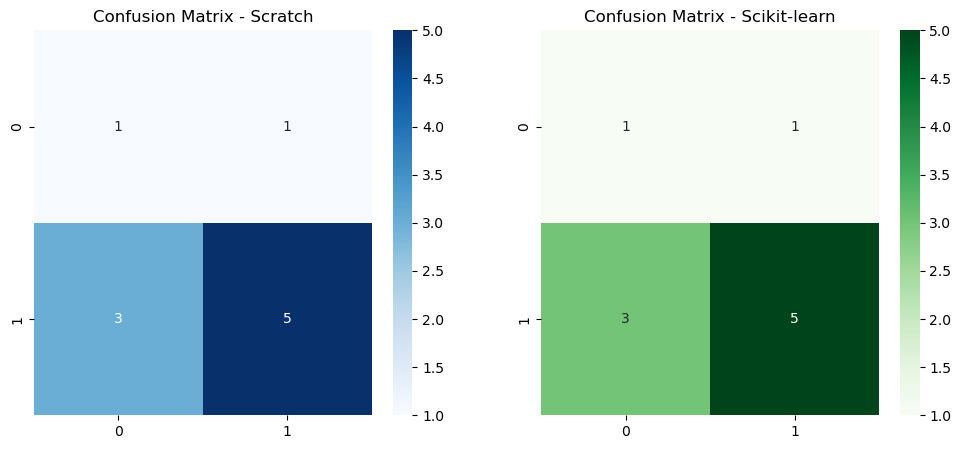

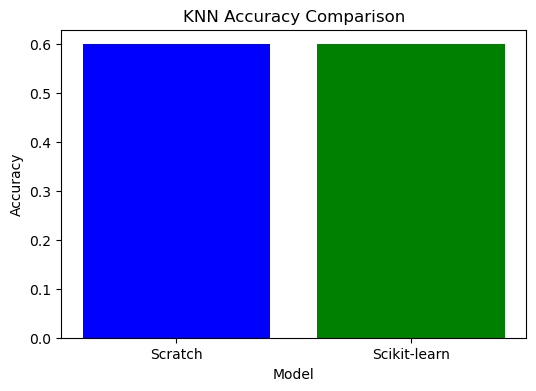

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_scratch, annot=True, fmt='d', cmap="Blues", ax=ax[0])
ax[0].set_title("Confusion Matrix - Scratch")

sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap="Greens", ax=ax[1])
ax[1].set_title("Confusion Matrix - Scikit-learn")

plt.show()

# Bar chart comparison
plt.figure(figsize=(6, 4))
plt.bar(["Scratch", "Scikit-learn"], [accuracy_scratch, accuracy_sklearn], color=["blue", "green"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison")
plt.show()


In [28]:
df = pd.read_csv('naive_bayes_dataset.csv')

In [29]:
df.sample(5)

,Contains_Buy,Contains_Win,Email_Length,Special_Characters,Class
33,No,No,Long,Few,Not Spam
43,No,No,Short,Few,Spam
8,Yes,No,Short,Few,Spam
11,Yes,No,Short,Few,Not Spam
2,Yes,Yes,Short,Few,Not Spam


In [30]:
def encode_labels(df):
    mapping = {'Yes': 1, 'No': 0, 'Short': 0, 'Long': 1, 'Few': 0, 'Many': 1, 'Spam': 1, 'Not Spam': 0}
    return df.replace(mapping)

df = encode_labels(df)

/tmp/ipykernel_81384/3987003594.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(mapping)


In [31]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
class_counts = y_train.value_counts().to_dict()
total_samples = len(y_train)
priors = {cls: count / total_samples for cls, count in class_counts.items()}


In [33]:
likelihoods = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))
for feature in X_train.columns:
    for cls in y_train.unique():
        class_subset = X_train[y_train == cls]
        feature_counts = class_subset[feature].value_counts().to_dict()
        total_class_samples = len(class_subset)
        for value, count in feature_counts.items():
            likelihoods[feature][value][cls] = count / total_class_samples


In [34]:
def predict_naive_bayes(X):
    predictions = []
    for _, row in X.iterrows():
        class_probs = {}
        for cls in priors.keys():
            prob = priors[cls]
            for feature, value in row.items():
                prob *= likelihoods[feature][value].get(cls, 1e-6)  # Small smoothing
            class_probs[cls] = prob
        predictions.append(max(class_probs, key=class_probs.get))
    return predictions

In [35]:
y_pred_scratch = predict_naive_bayes(X_test)
accuracy_scratch = np.mean(y_pred_scratch == y_test)
print(f'Naïve Bayes from Scratch Accuracy: {accuracy_scratch:.2f}')

Naïve Bayes from Scratch Accuracy: 0.60


In [36]:


# Train model
model = CategoricalNB()
model.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = model.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Scikit-learn Naïve Bayes Accuracy: {accuracy_sklearn:.2f}')

Scikit-learn Naïve Bayes Accuracy: 0.60


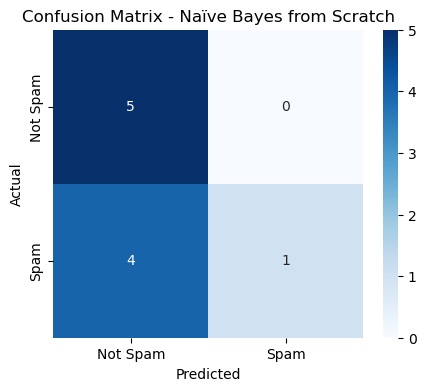

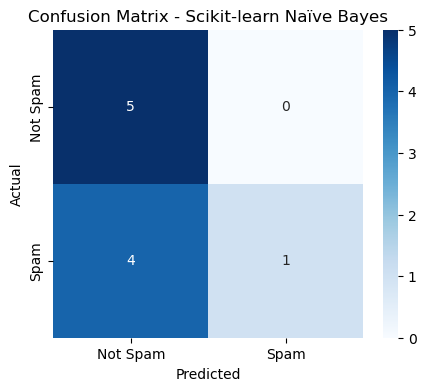

In [37]:


# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_scratch, "Confusion Matrix - Naïve Bayes from Scratch")
plot_confusion_matrix(y_test, y_pred_sklearn, "Confusion Matrix - Scikit-learn Naïve Bayes")

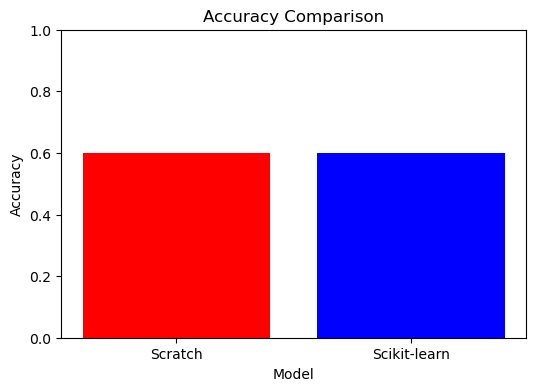

In [38]:
plt.figure(figsize=(6,4))
plt.bar(['Scratch', 'Scikit-learn'], [accuracy_scratch, accuracy_sklearn], color=['red', 'blue'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.show()